# Site-based statistics

RosEl, magenta-flank full-red vs. yellow-flank yellow individuals

In [73]:
library(dplyr)
library(data.table)
library(foreach)
library(ggplot2)
library(gridExtra)

plot_theme <- theme_bw() + 
                theme(plot.title = element_text(hjust = 0.5), 
                      panel.grid = element_blank())

In [2]:
setwd('/Users/apal/Phd/Projects/2021-snap_hap/genome_scans/')

## Read files

In [3]:
posStart = 52500000
posEnd = 53500000

In [7]:
w3KBs30b = fread('./pops_mFR_yYe/mFRyYe_RosEl_coordinate_w3000_s30.csv.gz')
w3KBs30b = w3KBs30b[start>(posStart) & end<(posEnd)]
str(w3KBs30b)

Classes ‘data.table’ and 'data.frame':	33234 obs. of  9 variables:
 $ scaffold   : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ start      : int  52500001 52500031 52500061 52500091 52500121 52500151 52500181 52500211 52500241 52500271 ...
 $ end        : int  52503000 52503030 52503060 52503090 52503120 52503150 52503180 52503210 52503240 52503270 ...
 $ mid        : num  52501542 52501542 52501580 52501647 52501667 ...
 $ sites      : int  157 157 157 158 156 156 156 157 156 153 ...
 $ pi_mFR     : num  0.125 0.125 0.124 0.126 0.126 ...
 $ pi_yYe     : num  0.0811 0.0811 0.0804 0.085 0.0853 0.0868 0.0872 0.0901 0.0933 0.0982 ...
 $ dxy_mFR_yYe: num  0.106 0.106 0.105 0.108 0.109 ...
 $ Fst_mFR_yYe: num  0.0146 0.0146 0.0146 0.0137 0.0137 0.0126 0.0126 0.0121 0.0119 0.0115 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [74]:
# site allele freq
frq_mFR = fread('./pops_mFR_yYe/mFR_RosEl.frq', header=F)
frq_mFR = frq_mFR[-1,]
colnames(frq_mFR) = c('CHROM',	'POS', 'N_ALLELES',	'N_CHR', 'REF', 'ALT')
frq_yYe = fread('./pops_mFR_yYe/yYe_RosEl.frq', header=F)
frq_yYe = frq_yYe[-1,]
colnames(frq_yYe) = c('CHROM',	'POS', 'N_ALLELES',	'N_CHR', 'REF', 'ALT')

# site pi-within
sitePi_mFR = fread('./pops_mFR_yYe/mFR_RosEl.sites.pi')
sitePi_yYe = fread('./pops_mFR_yYe/yYe_RosEl.sites.pi')

# site Fst
siteFst = fread('./pops_mFR_yYe/mFRyYe_RosEl.weir.fst')

## Plots – Fst, dxy & pi

pdf 
  2

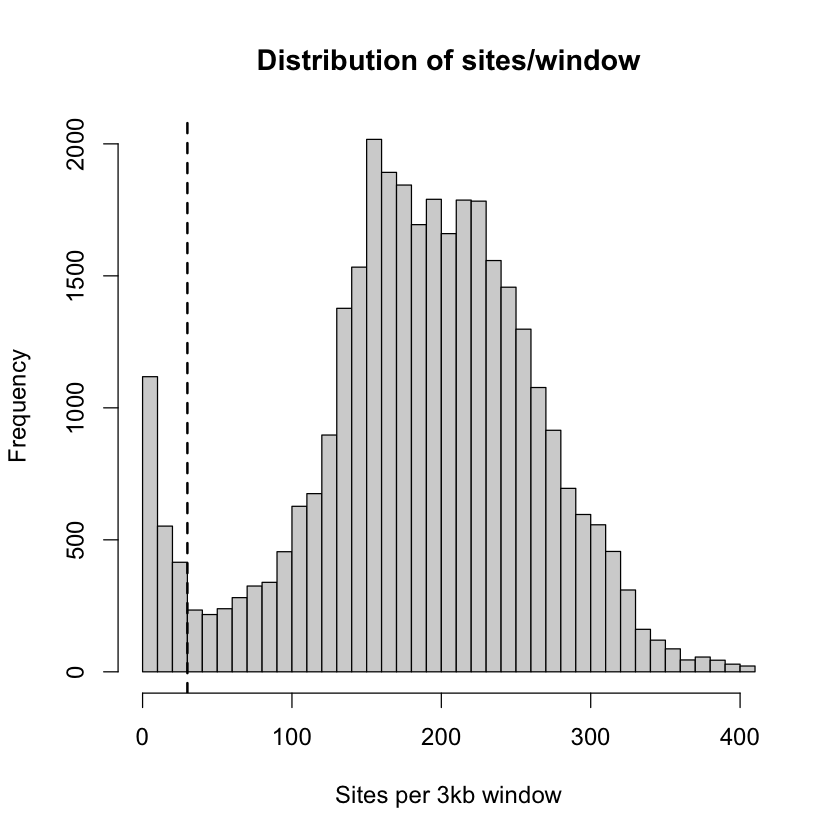

In [120]:
options(repr.plot.width=7, repr.plot.height=7)
par(cex=1.2)
hist(w3KBs30b$sites, breaks=50,
     main='Distribution of sites/window', xlab='Sites per 3kb window', ylab='Frequency')
abline(v=30, lwd=2, lty=2)

# svg('./_figures/mFRyYe_w3Ks30b/hist_sitesPerWin3K.svg', width=7, height=7, pointsize=12)
# hist(w3KBs30b$sites, breaks=50, main='', xlab='Sites per 3kb window', ylab='Frequency')
# abline(v=30, lwd=2)
# dev.off()

In [30]:
xLimit=c(52.7,53.25)

### Plots in 3kb windows

pdf 
  2

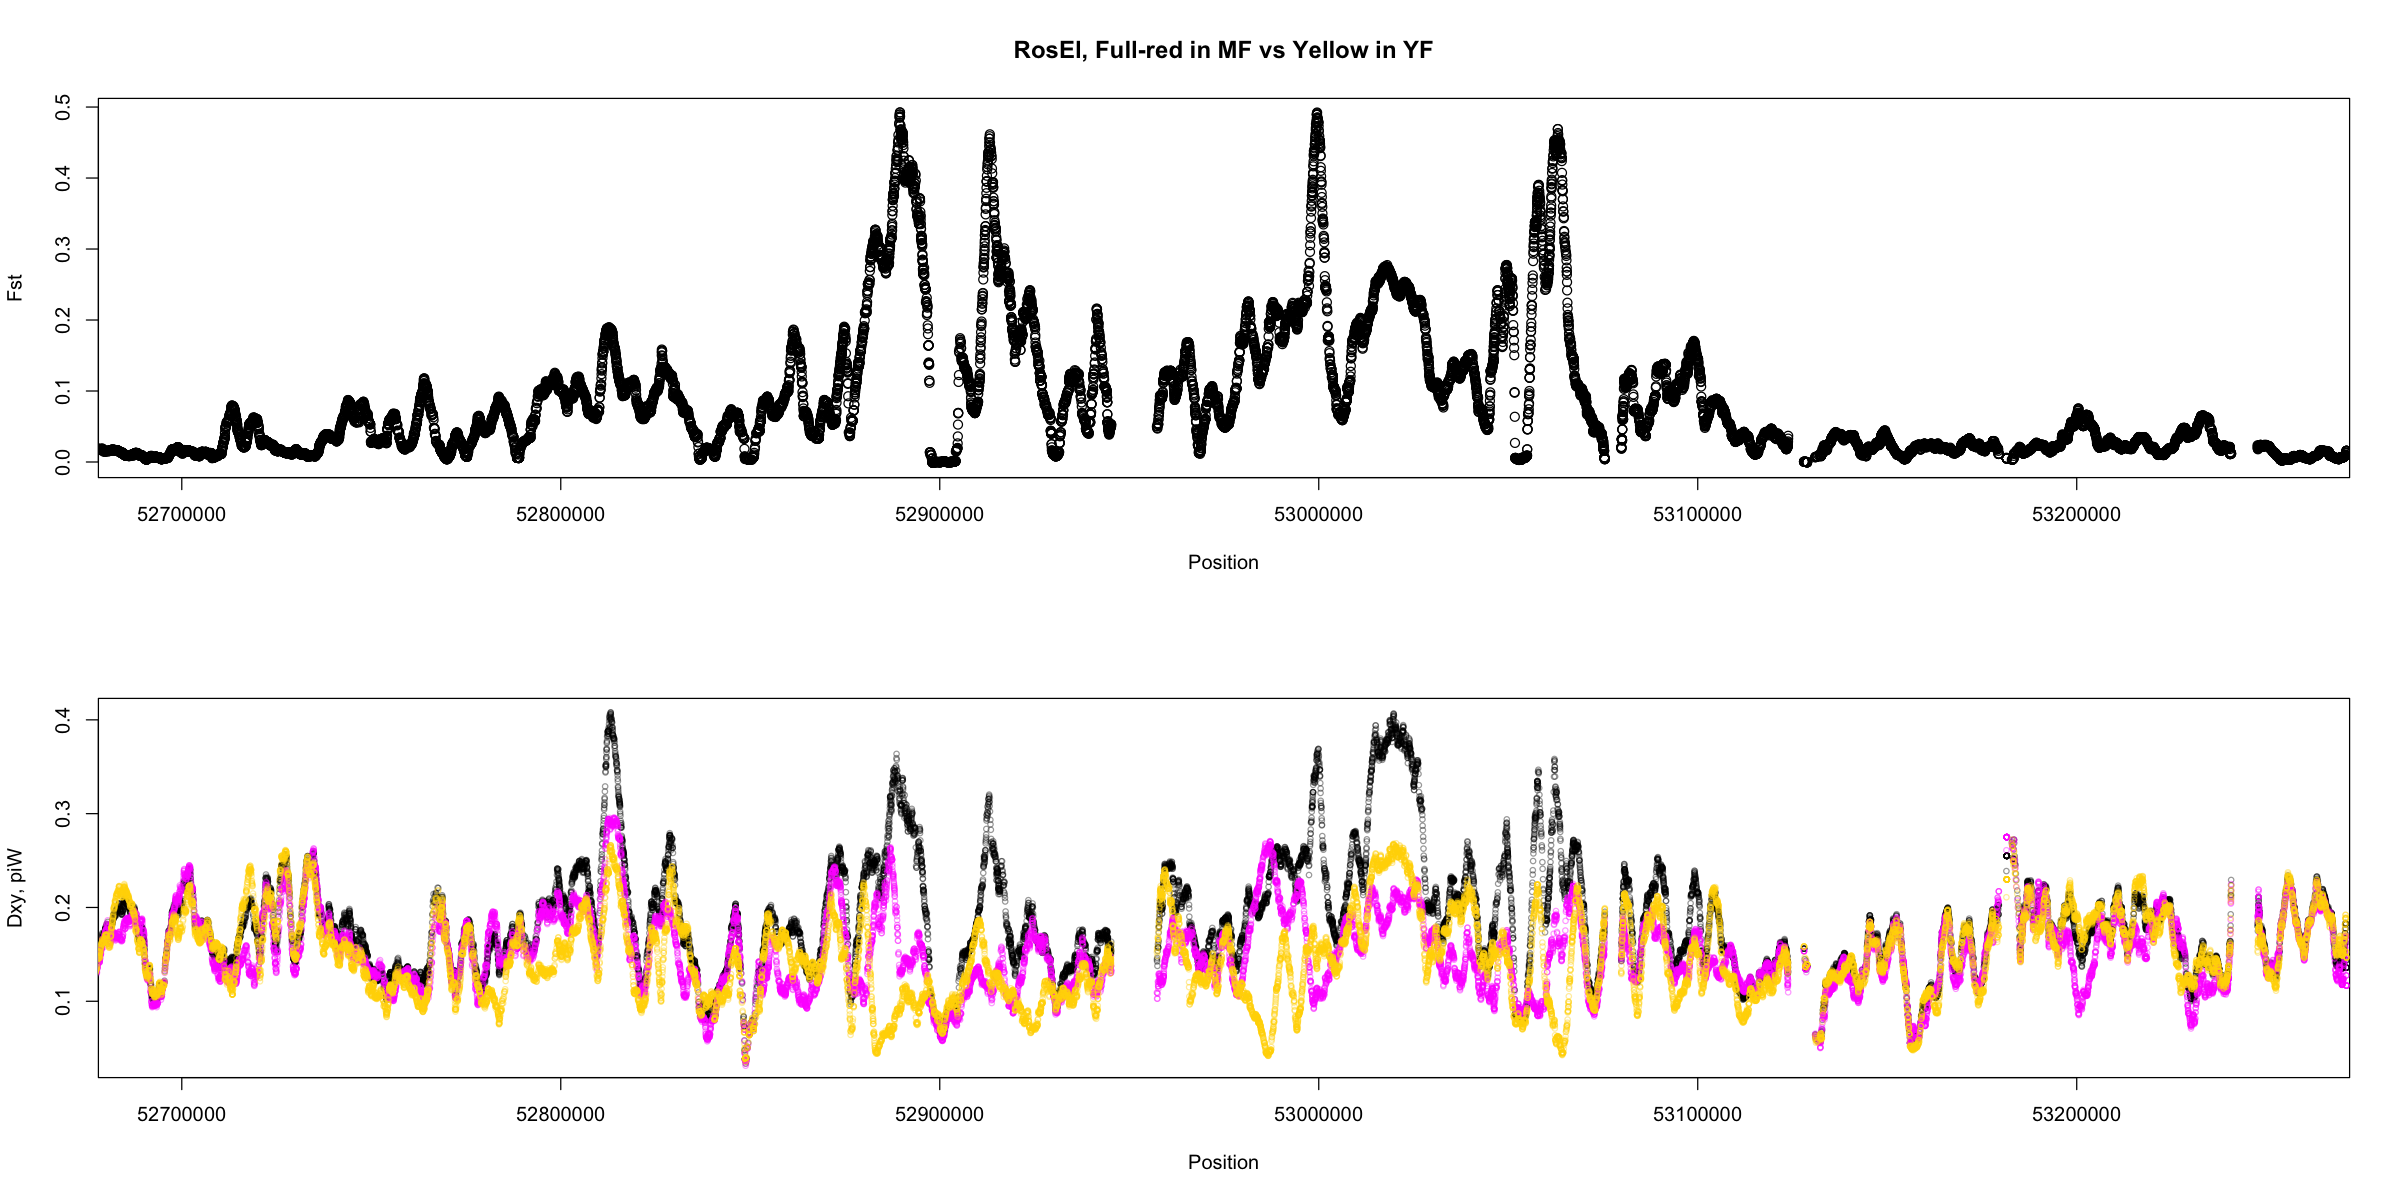

In [125]:
options(repr.plot.width=20 , repr.plot.height=10)
xLabel = 'Position'

par(cex=1.2, mfrow=c(2,1))

#Fst
plot(Fst_mFR_yYe~mid, w3KBs30b[sites>30], 
     xlim=xLimit*1e6, 
     main='RosEl, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')
#dxy
plot(dxy_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, xlab='Position', ylab='Dxy, piW', col=alpha('black',0.4), cex=0.6)
points(pi_mFR~mid, w3KBs30b[sites>30], col=alpha('magenta',0.4), cex=0.6)
points(pi_yYe~mid, w3KBs30b[sites>30], col=alpha('gold',0.4), cex=0.6)

# svg('./_figures/mFRyYe_w3Ks30b/Fst+PiDxy_win3K.svg', width=20, height=10, pointsize=12)
# par(cex=1.2, mfrow=c(2,1))
# plot(Fst_mFR_yYe~mid, w3KBs30b[sites>30], 
#      xlim=xLimit*1e6, 
#      main='RosEl, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')
# plot(dxy_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, xlab='Position', ylab='Dxy, piW', col=alpha('black',0.4), cex=0.6)
# points(pi_mFR~mid, w3KBs30b[sites>30], col=alpha('magenta',0.4), cex=0.6)
# points(pi_yYe~mid, w3KBs30b[sites>30], col=alpha('gold',0.4), cex=0.6)
# dev.off()

pdf 
  2

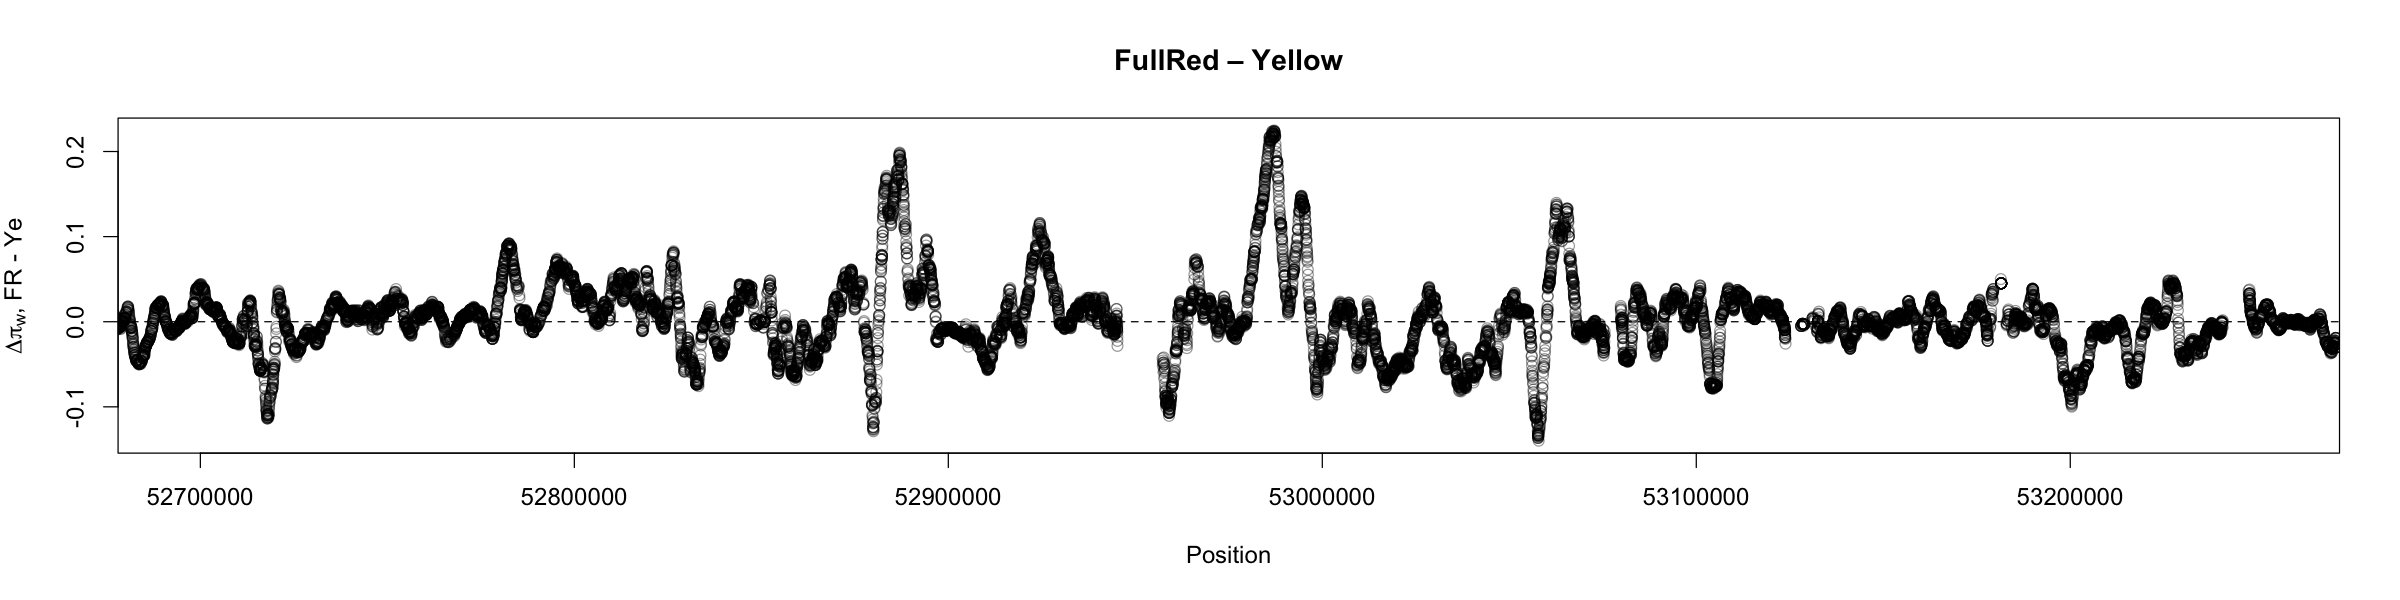

In [134]:
options(repr.plot.width=20 , repr.plot.height=5)
par(cex=1.2)
plot((pi_mFR-pi_yYe)~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, 
     main = 'FullRed – Yellow', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"), 
     col=alpha('black',0.4), cex=1)
abline(h=0, lty=2)

# ## Save plot
# svg('./_figures/mFRyYe_w3Ks30b/deltaPiW_win3K.svg', width=20, height=5)
# par(cex=1.2)
# plot((pi_mFR-pi_yYe)~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, 
#      main = 'FullRed – Yellow', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"), 
#      col=alpha('black',0.4), cex=1)
# abline(h=0, lty=2)
# dev.off()

### Plots per site

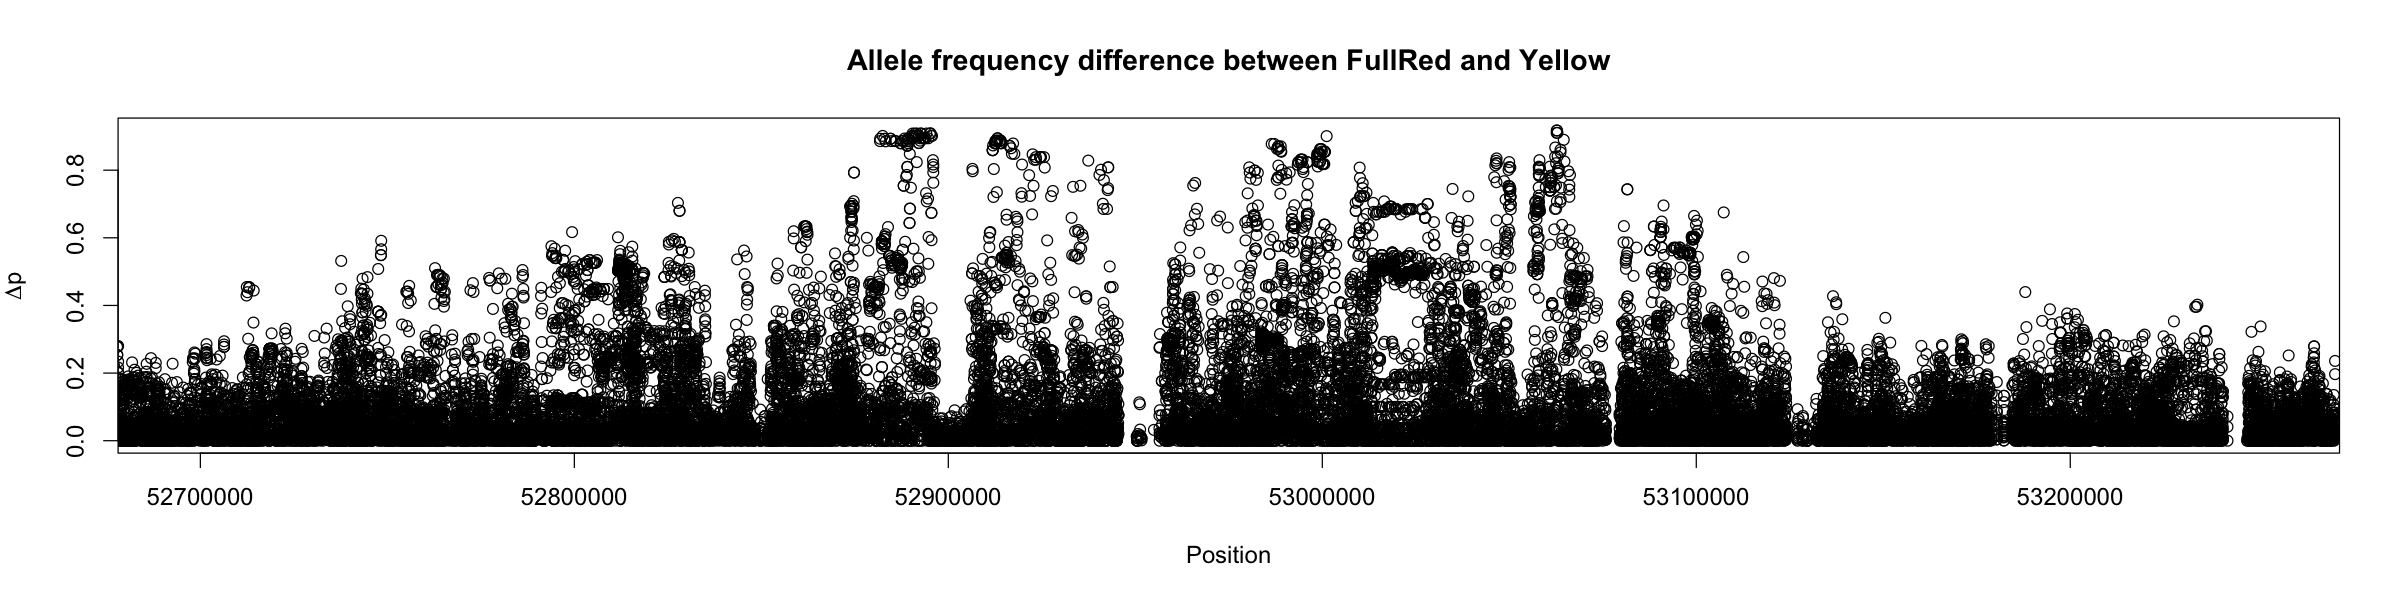

In [189]:
options(repr.plot.width=20 , repr.plot.height=5)
par(cex=1.2)
plot(frq_mFR$POS, abs(frq_mFR$REF-frq_yYe$REF), xlim=xLimit*1e6,
    main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p))

# ## Save plot
# svg('./_figures/mFRyYe_w3Ks30b/alleleFreq.svg', width=20, height=5)
# par(cex=1.2)
# plot(frq_mFR$POS, abs(frq_mFR$REF-frq_yYe$REF), xlim=xLimit*1e6,
#     main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p))
# dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01213 0.03684 0.07923 0.09231 0.91733 

pdf 
  2

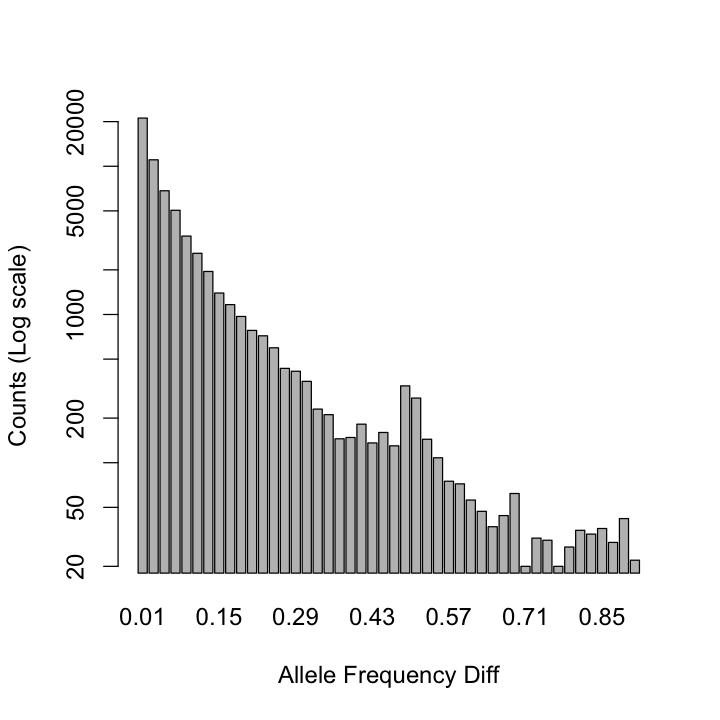

In [190]:
options(repr.plot.width=6, repr.plot.height=6)
summary(abs(frq_mFR$REF-frq_yYe$REF))

par(cex=1.2)
h = hist(abs(frq_mFR$REF-frq_yYe$REF), breaks=50, plot = F)
barplot(height=(h$counts), names=h$mids, log='y',
       xlab='Allele Frequency Diff', ylab='Counts (Log scale)')

## Save plot
svg('./_figures/mFRyYe_w3Ks30b/hist_alleleFreq.svg', width=6, height=6)
par(cex=1.2)
barplot(height=(h$counts), names=h$mids, log='y',
       xlab='Allele Frequency Diff', ylab='Counts (Log scale)')
dev.off()

### Plots per site and windows

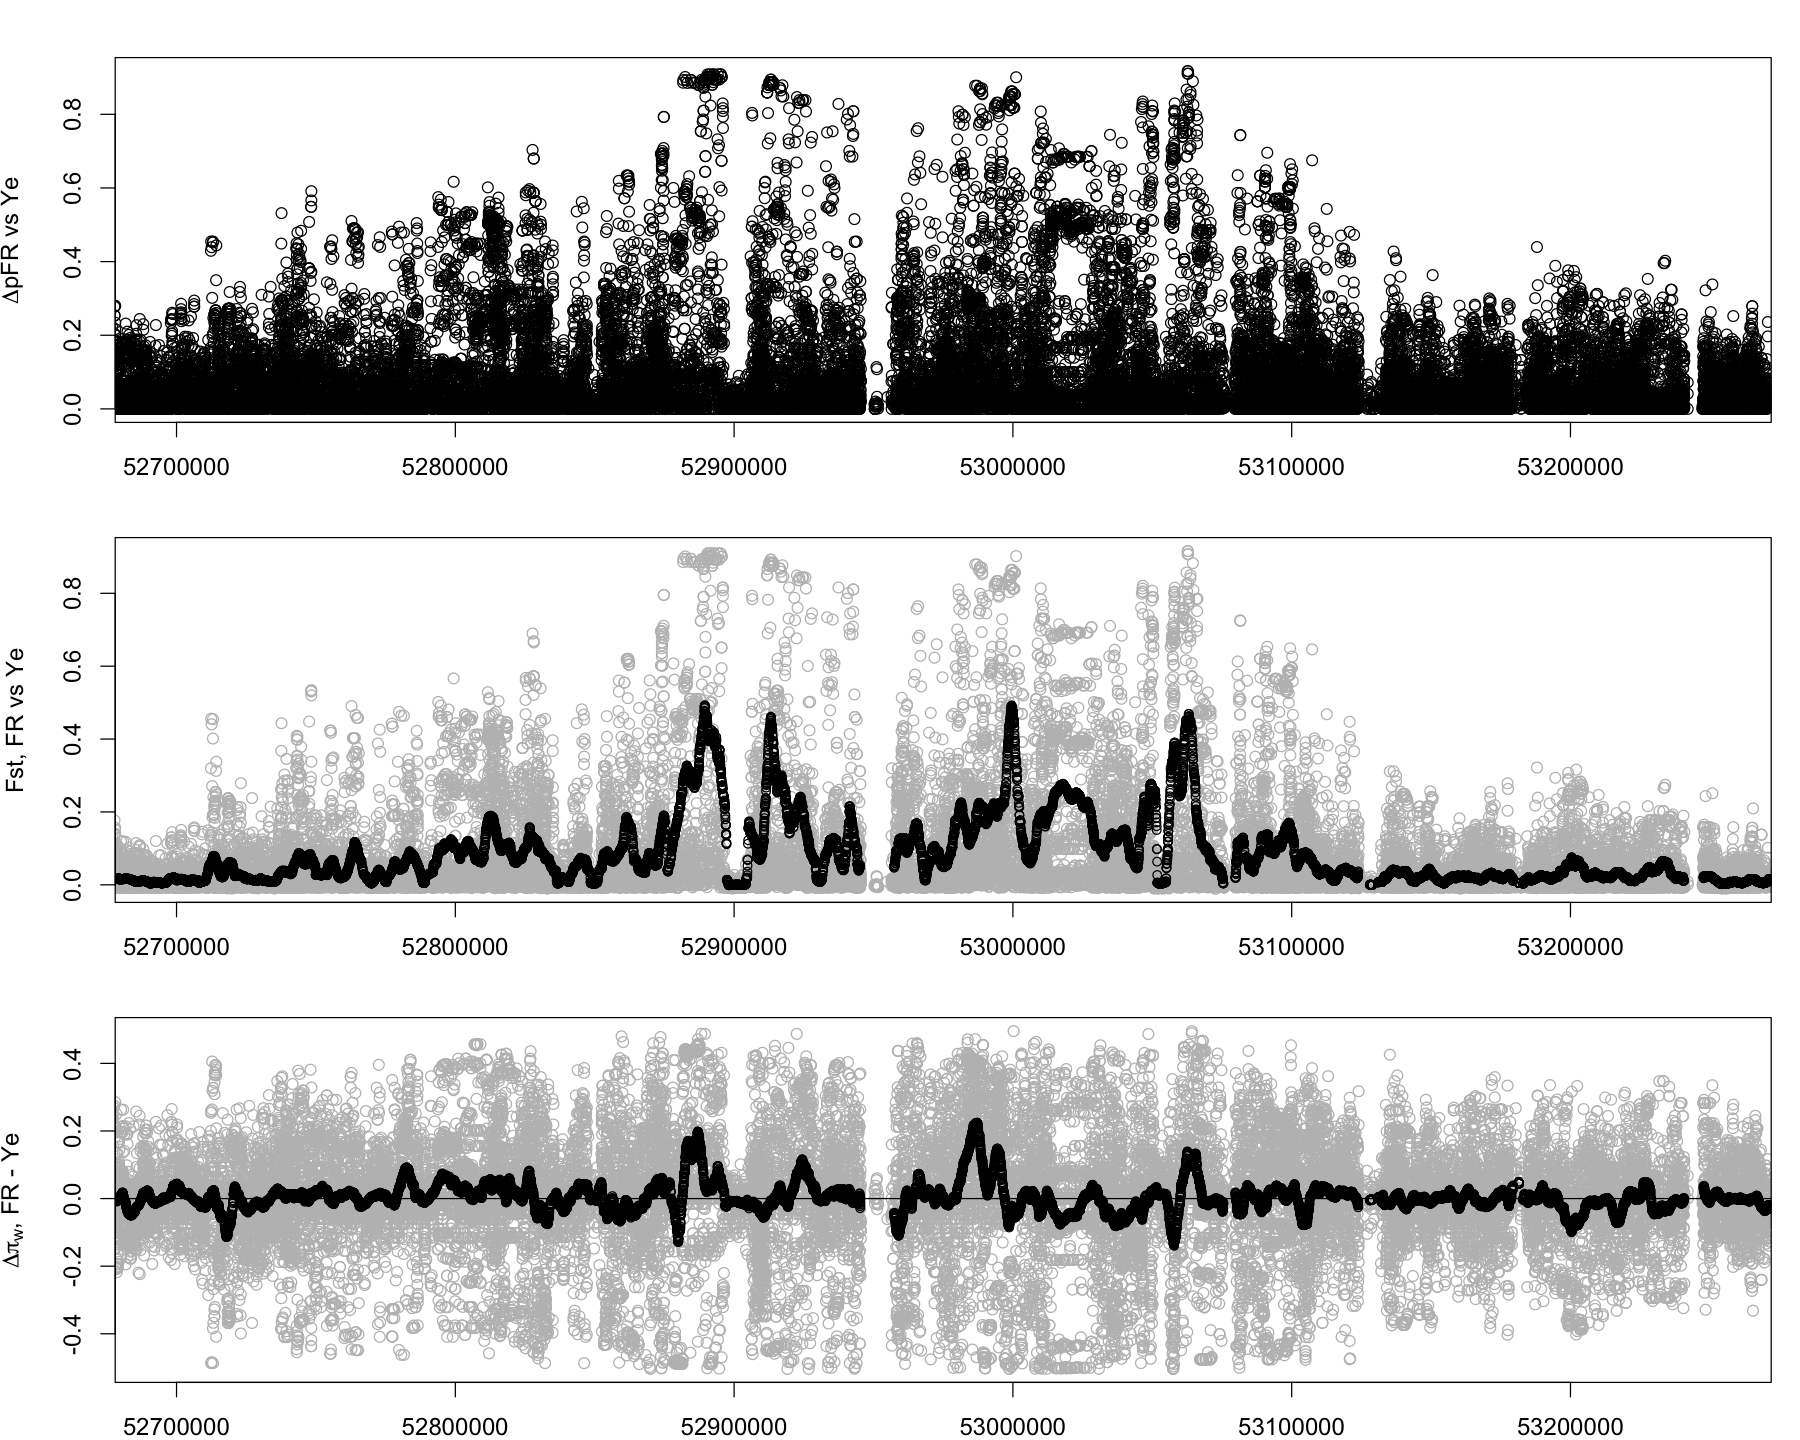

In [214]:
options(repr.plot.width=15 , repr.plot.height=12)

par(mfrow=c(3,1), cex=1, mar=c(2,4,2,1))
# par(mfrow=c(3,1), cex=1)

## Allele Freq Difference
par(cex=1.2)
plot(frq_mFR$POS, abs(frq_mFR$REF-frq_yYe$REF), xlim=xLimit*1e6,
     # main='Allele frequency difference between FullRed and Yellow', 
     xlab='Position', ylab=expression(Delta*p*'FR vs Ye'))

## Fst
plot(siteFst$POS, siteFst$WEIR_AND_COCKERHAM_FST, xlim=xLimit*1e6, col='grey',
     # main='RosEl, Full-red in MF vs Yellow in YF', 
     xlab='Position', ylab='Fst, FR vs Ye')
points(Fst_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, cex=0.8)

## Difference in pi-within
plot(sitePi_mFR$POS, (sitePi_mFR$PI-sitePi_yYe$PI), xlim=xLimit*1e6, col='grey', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"))
points((pi_mFR-pi_yYe)~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
# points(dxy_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
abline(h=0)

In [215]:
svg('./_figures/mFRyYe_w3Ks30b/AF+Fst+PiDxy_win3K+sites.svg', width=15, height=12)
# --- 
par(mfrow=c(3,1), cex=1, mar=c(2,4,2,1))

## Allele Freq Difference
par(cex=1.2)
plot(frq_mFR$POS, abs(frq_mFR$REF-frq_yYe$REF), xlim=xLimit*1e6,
     # main='Allele frequency difference between FullRed and Yellow', 
     xlab='Position', ylab=expression(Delta*p*'FR vs Ye'))

## Fst
plot(siteFst$POS, siteFst$WEIR_AND_COCKERHAM_FST, xlim=xLimit*1e6, col='grey',
     # main='RosEl, Full-red in MF vs Yellow in YF', 
     xlab='Position', ylab='Fst, FR vs Ye')
points(Fst_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, cex=0.8)

## Difference in pi-within
plot(sitePi_mFR$POS, (sitePi_mFR$PI-sitePi_yYe$PI), xlim=xLimit*1e6, col='grey', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"))
points((pi_mFR-pi_yYe)~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
# points(dxy_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
abline(h=0)
# ---
dev.off()

pdf 
  2